# Sales Analysis Project

#### Import relevant data

In [1]:
import pandas as pd
import os

#### Get all 12 files in a folder and put them in a single file

In [2]:
from os import listdir
from os.path import isfile, join
allfiles = [f for f in listdir("D:\\Python project\\Sales_Data") if isfile(join("D:\\Python project\\Sales_Data", f))]

data_yearly = pd.DataFrame()

for file in allfiles:
    df = pd.read_csv("D:\\Python project\\Sales_Data\\" + file)
    data_yearly = pd.concat([data_yearly, df])
    
data_yearly.info()

data_yearly.to_csv("Merged_data.csv", index = False)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 186850 entries, 0 to 11685
Data columns (total 6 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   Order ID          186305 non-null  object
 1   Product           186305 non-null  object
 2   Quantity Ordered  186305 non-null  object
 3   Price Each        186305 non-null  object
 4   Order Date        186305 non-null  object
 5   Purchase Address  186305 non-null  object
dtypes: object(6)
memory usage: 10.0+ MB


#### Now read the updated csv file 

In [3]:
df = pd.read_csv(".\\Merged_data.csv")
df.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001"
1,NaN,NaN,NaN,NaN,NaN,NaN
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215"
3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"


## Q1: Which month has the best sale? 

#### Dropping all NaN rows. 

In [4]:
df_na = df[df.isnull().any(axis=1)]
df_na.head()

#dropping rows with all NaN values
df = df.dropna(how = "all")

#### Cleaning problematic month that contains "Or".

In [5]:
df["Month"] = df["Order Date"].astype(str).str[0:2]
df["Month"].value_counts()
#there is an extra month called "Or" which needs to be deleted. 

12    24984
10    20282
04    18279
11    17573
05    16566
03    15153
07    14293
06    13554
02    11975
08    11961
09    11621
01     9709
Or      355
Name: Month, dtype: int64

In [6]:
df = df[df["Month"].str[0:2] != "Or"]

#### Create a month column.

In [7]:
df["Month"] = df["Month"].astype(int)
df.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",4
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",4
3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",4


#### Convert columns type from "object" to "integer" and "float". 

In [8]:
df["Quantity Ordered"] = df["Quantity Ordered"].astype("int64")
df["Price Each"] = df["Price Each"].astype(float)

#### Create a sales column.

In [9]:
df["Sales"] = df["Quantity Ordered"] * df["Price Each"]
df.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",4,23.90
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",4,99.99
3,176560,Google Phone,1,600.00,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,600.00
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,11.99
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",4,11.99


#### Answer to Q1: which month has the best sales?

In [10]:
monthly_sales = pd.DataFrame()
monthly_sales = df.groupby("Month").sum()
monthly_sales["Sales"] = monthly_sales["Sales"].astype("int64")

monthly_sales.sort_values(by = "Sales", ascending = False).head(1)

,Quantity Ordered,Price Each,Sales
Month,,,
12,28114,4.588415e+06,4613443


#### It appears that December is the month that has the best sales, with a revenue of 463443 unit price. We can graph it below. 

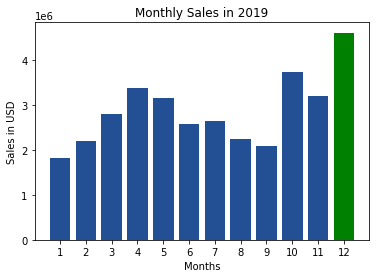

In [11]:
import matplotlib.pyplot as plt

col = []
for val in monthly_sales["Sales"]:
    if val == monthly_sales["Sales"].max():
        col.append('green')
    else:
        col.append('#235094')


plt.bar(monthly_sales.index, monthly_sales["Sales"], color = col)
plt.xticks(monthly_sales.index)
plt.xlabel("Months")
plt.ylabel("Sales in USD")
plt.title("Monthly Sales in 2019")
plt.show()

## Q2: Which city has the best sales? 

#### Create a new city column. 

In [12]:
def city_name(address):
    return address.split(",")[1]
        
def state_code(address):
    temp1 = address.split(",")[2]
    temp2 = temp1[0:3]
    return temp2[1:3]

df["City"] = df["Purchase Address"].apply(lambda x: city_name(x) + " " + state_code(x))

df.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,City
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",4,23.90,Dallas TX
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",4,99.99,Boston MA
3,176560,Google Phone,1,600.00,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,600.00,Los Angeles CA
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,11.99,Los Angeles CA
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",4,11.99,Los Angeles CA


#### Create a sales column.

In [13]:
city_sales = df.groupby("City").sum()
city_sales = city_sales[["Quantity Ordered", "Sales"]]
city_sales["Sales"] = city_sales["Sales"].astype("int64")
city_sales["Cities"] = city_sales.index
city_sales

,Quantity Ordered,Sales,Cities
City,,,
Atlanta GA,16602,2795498,Atlanta GA
Austin TX,11153,1819581,Austin TX
Boston MA,22528,3661642,Boston MA
Dallas TX,16730,2767975,Dallas TX
Los Angeles CA,33289,5452570,Los Angeles CA
New York City NY,27932,4664317,New York City NY
Portland ME,2750,449758,Portland ME
Portland OR,11303,1870732,Portland OR
San Francisco CA,50239,8262203,San Francisco CA


#### Answer to Q2: which city has the best sales?
#### The plot shows that San Francisco CA has the best sales. 

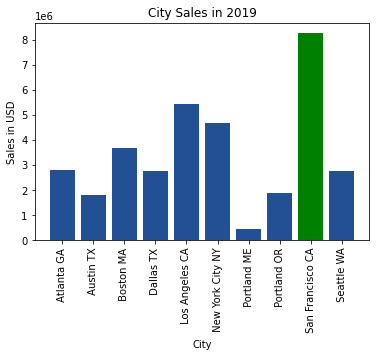

In [14]:
import matplotlib.pyplot as plt

colour = []
for val in city_sales["Sales"]:
    if val == city_sales["Sales"].max():
        colour.append('green')
    else:
        colour.append("#235094")


plt.bar(city_sales["Cities"], city_sales["Sales"], color = colour)
plt.xticks(city_sales["Cities"], rotation = "vertical")
plt.xlabel("City")
plt.ylabel("Sales in USD")
plt.title("City Sales in 2019")
plt.show()

## Q3: What time should we display advertisements to maximize likelihood of buying?

#### Create new columns "Time", "Hour" and "Order Count".

In [15]:
def get_time(time):
    return time.split(" ")[1]   

df["Time"] = df["Order Date"].apply(lambda x: get_time(x))
df["Hour"] = df["Time"].str[0:2].astype(int)
df["Order Count"] = 1

df.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,City,Time,Hour,Order Count
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",4,23.90,Dallas TX,08:46,8,1
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",4,99.99,Boston MA,22:30,22,1
3,176560,Google Phone,1,600.00,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,600.00,Los Angeles CA,14:38,14,1
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,11.99,Los Angeles CA,14:38,14,1
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",4,11.99,Los Angeles CA,09:27,9,1


#### A dataframe of hour time and purchase count.

In [16]:
hourly_sales = df.groupby("Hour").sum()
hourly_sales["Hours"] = hourly_sales.index
hourly_sales.head()

,Quantity Ordered,Price Each,Month,Sales,Order Count,Hours
Hour,,,,,,
0,4428,709296.70,27554,713721.27,3910,0
1,2619,458490.00,16657,460866.88,2350,1
2,1398,233833.64,8507,234851.44,1243,2
3,928,144726.42,5904,145757.89,831,3
4,937,162058.18,6148,162661.01,854,4


#### Answer to Q3: which city has the best sales?

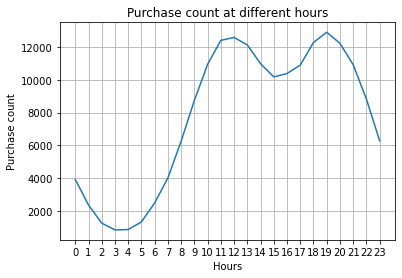

In [17]:
import matplotlib.pyplot as plt

plt.plot(hourly_sales["Hours"], hourly_sales["Order Count"])
plt.xticks(hourly_sales["Hours"])
plt.xlabel("Hours")
plt.ylabel("Purchase count")
plt.title("Purchase count at different hours")
plt.grid()
plt.show()

#### It appears that there are two peaks for purchasing, one at noon and the other around 19:00. 

## Q4: What products are most often sold together?

#### Select those with identical Order ID to determine whether they were sold together. 

In [39]:
together = df[df["Order ID"].duplicated(keep = False)]
together.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,City,Time,Hour,Order Count
3,176560,Google Phone,1,600.00,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,600.00,Los Angeles CA,14:38,14,1
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,11.99,Los Angeles CA,14:38,14,1
18,176574,Google Phone,1,600.00,04/03/19 19:42,"20 Hill St, Los Angeles, CA 90001",4,600.00,Los Angeles CA,19:42,19,1
19,176574,USB-C Charging Cable,1,11.95,04/03/19 19:42,"20 Hill St, Los Angeles, CA 90001",4,11.95,Los Angeles CA,19:42,19,1
30,176585,Bose SoundSport Headphones,1,99.99,04/07/19 11:31,"823 Highland St, Boston, MA 02215",4,99.99,Boston MA,11:31,11,1


#### Create a dataframe which only shows the products that were sold together. 

In [43]:
together["Product Together"] = together.groupby("Order ID")["Product"].transform(lambda x: ','.join(x))
together1 = together[["Order ID", "Product Together"]]
together2 = together1[together1.duplicated(keep = "last")]
together2.head()


<ipython-input-43-b68e57b56058>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  together["Product Together"] = together.groupby("Order ID")["Product"].transform(lambda x: ','.join(x))


,Order ID,Product Together
3,176560,"Google Phone,Wired Headphones"
18,176574,"Google Phone,USB-C Charging Cable"
30,176585,"Bose SoundSport Headphones,Bose SoundSport Hea..."
32,176586,"AAA Batteries (4-pack),Google Phone"
119,176672,"Lightning Charging Cable,USB-C Charging Cable"


#### Count the number of pairing combination of products. 

In [57]:
from itertools import combinations
from collections import Counter

count = Counter()

for cell in together2["Product Together"]:
    list = cell.split(",")
    count.update(Counter(combinations(list, 2)))


#### Answer to Q4: What products are most often sold together?
#### The products that are most often sold together are iPhone and Charging Cable. 

In [60]:
from operator import itemgetter

#Top 10 combinations that are sold. 
N = 10
dict(sorted(count.items(), key = itemgetter(1), reverse = True)[:N])

{('iPhone', 'Lightning Charging Cable'): 1135,
 ('Google Phone', 'USB-C Charging Cable'): 1129,
 ('iPhone', 'Wired Headphones'): 540,
 ('Google Phone', 'Wired Headphones'): 535,
 ('iPhone', 'Apple Airpods Headphones'): 439,
 ('Vareebadd Phone', 'USB-C Charging Cable'): 412,
 ('USB-C Charging Cable', 'Wired Headphones'): 292,
 ('Google Phone', 'Bose SoundSport Headphones'): 283,
 ('Vareebadd Phone', 'Wired Headphones'): 184,
 ('Lightning Charging Cable', 'Wired Headphones'): 161}

#### Special arrangements such as deals or recommended product can be set up for marketing when it comes to these products. 

## Q5: What product was sold the most? 

#### Create new columns average price and count total product sold for each. 

In [70]:
product = df.groupby("Product").sum()
product["Product"] = product.index
product["Price"] = product["Price Each"]/ product["Quantity Ordered"]
product.head()

,Quantity Ordered,Price Each,Month,Sales,Hour,Order Count,Product,Price
Product,,,,,,,,
20in Monitor,4129,451068.99,29336,454148.71,58764,4101,20in Monitor,109.244124
27in 4K Gaming Monitor,6244,2429637.70,44440,2435097.56,90916,6230,27in 4K Gaming Monitor,389.115583
27in FHD Monitor,7550,1125974.93,52558,1132424.50,107540,7507,27in FHD Monitor,149.135752
34in Ultrawide Monitor,6199,2348718.19,43304,2355558.01,89076,6181,34in Ultrawide Monitor,378.886625
AA Batteries (4-pack),27635,79015.68,145558,106118.40,298342,20577,AA Batteries (4-pack),2.859261


#### Answer to Q5: What product was sold the most?
#### AAA Batteries (4-pack) was sold the most. 

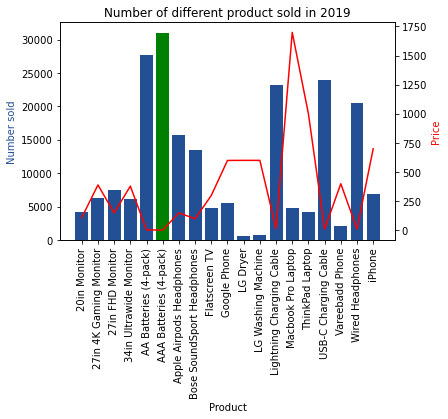

In [81]:
import matplotlib.pyplot as plt

colour1 = []
for val in product["Quantity Ordered"]:
    if val == product["Quantity Ordered"].max():
        colour1.append('green')
    else:
        colour1.append("#235094")

fig, ax = plt.subplots()
        
ax2 = ax.twinx()        
        
ax.bar(product["Product"], product["Quantity Ordered"], color = colour1)
ax2.plot(product["Product"], product["Price"], color = "red")

ax.set_xticklabels(product["Product"], rotation = "vertical")
ax.set_xlabel("Product")
ax.set_ylabel("Number sold", color = "#235094")
ax2.set_ylabel("Price", color = "red")
ax.set_title("Number of different product sold in 2019")

plt.show()

#### One reason for this might be due to the lower price of batteries, the demand of it is higher. 